In [1]:
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

train = pd.read_csv("fall-ml-2-mipt-2024/train.csv")
target = pd.read_csv("fall-ml-2-mipt-2024/test.csv")

X = train.drop(columns=['y', 'index'])
y = train['y']                         
target_ids = target['index']               
X_target = target.drop(columns=['index']) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def mape_loss(y_pred, data):
    y_true = data.get_label()
    grad = (y_pred - y_true) / np.maximum(1e-5, np.abs(y_true))
    hess = 1 / np.maximum(1e-5, np.abs(y_true))
    return grad, hess

def mape_metric(y_pred, data):
    y_true = data.get_label()
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(1e-5, np.abs(y_true))))
    return 'mape', mape, False

# Обучение модели
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    "objective": mape_loss,  # Кастомная функция потерь
    "metric": "None",        # Отключение встроенных метрик
    "learning_rate": 0.05,
    "num_leaves": 31,
    "random_state": 42,
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    feval=mape_metric,  # Кастомная метрика
    num_boost_round=500,
    callbacks=[lgb.early_stopping(stopping_rounds=50)], 
)

y_test_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
print(f"MAPE на тестовой выборке: {mape}")

# Итоговые предсказания и сохранение в .csv файл
y_target_pred = model.predict(X_target)

submission = pd.DataFrame({"index": target["index"], "y": y_target_pred})
submission.to_csv("submission.csv", index=False)

[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 15
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	training's mape: 0.238605	valid_1's mape: 0.243669
MAPE на тестовой выборке: 0.24366911544674758


In [1]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from IPython.display import display, Markdown, Latex

In [2]:
train_df  = pd.read_csv('fall-ml-2-mipt-2024/train.csv',  header = 0)
test_df   = pd.read_csv('fall-ml-2-mipt-2024/test.csv',   header = 0)
sample_df = pd.read_csv('fall-ml-2-mipt-2024/sample.csv', header = 0)

In [3]:
x_df = train_df.drop(['index', 'y'], axis = 1)
y_df = train_df['y']

X_target = test_df.drop(['index'], axis = 1)

In [4]:
x_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,17.0,1,22,0,1,0.0,0.0,185.18,287.05,0.85,6.33,54.38,0.0,0.0,0.00,30.54,0.0,509.94
1,21.0,1,32,0,1,0.0,0.0,76.28,522.28,0.00,7.96,190.97,0.0,0.0,0.00,0.00,0.0,606.52
2,10.0,1,45,1,2,0.0,0.0,131.27,566.15,0.00,20.23,328.13,0.0,0.0,8.85,0.00,0.0,726.50
3,10.0,1,41,0,2,0.0,0.0,307.49,926.55,0.00,8.08,351.38,0.0,0.0,0.00,5.05,0.0,1247.17
4,19.0,1,36,0,1,0.0,0.0,4.18,529.77,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,533.95


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 42)

In [6]:
features = X_train.columns
features

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18'],
      dtype='object')

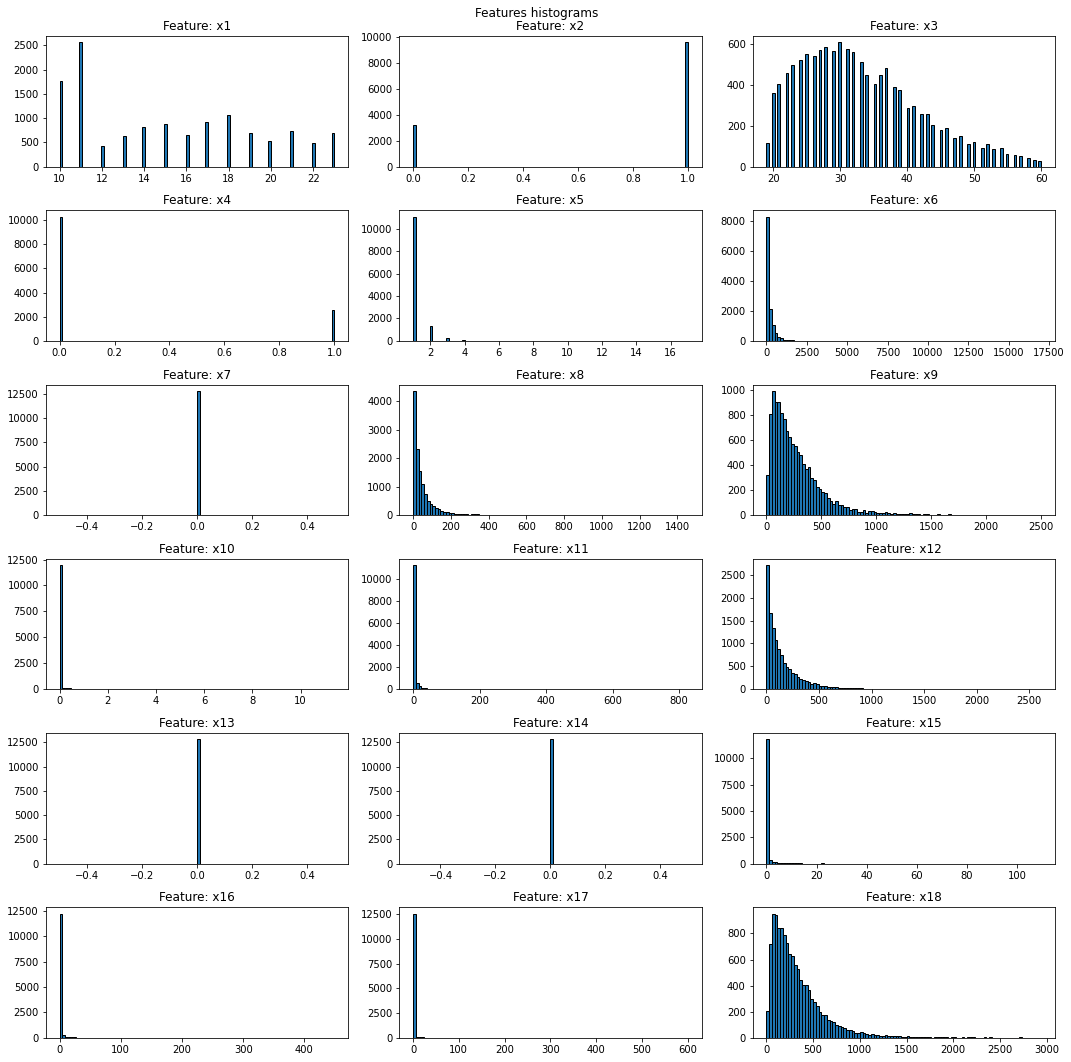

In [7]:
n_cols = 3
n_rows = int(len(features) / n_cols) 

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))
fig.suptitle('Features histograms')

for i in range(n_rows):
    for j in range(n_cols):
        feature = features[j + n_cols * i]
        axs[i, j].hist(X_train[feature], bins=100, edgecolor="black")
        axs[i, j].set_title(f'Feature: {feature}')
        
plt.tight_layout()

In [8]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.0)
sel.fit(X_train)

constant_features = [f for f in X_train.columns if f not in X_train.columns[sel.get_support()]]
print(constant_features)

['x7', 'x13', 'x14']


['x18']


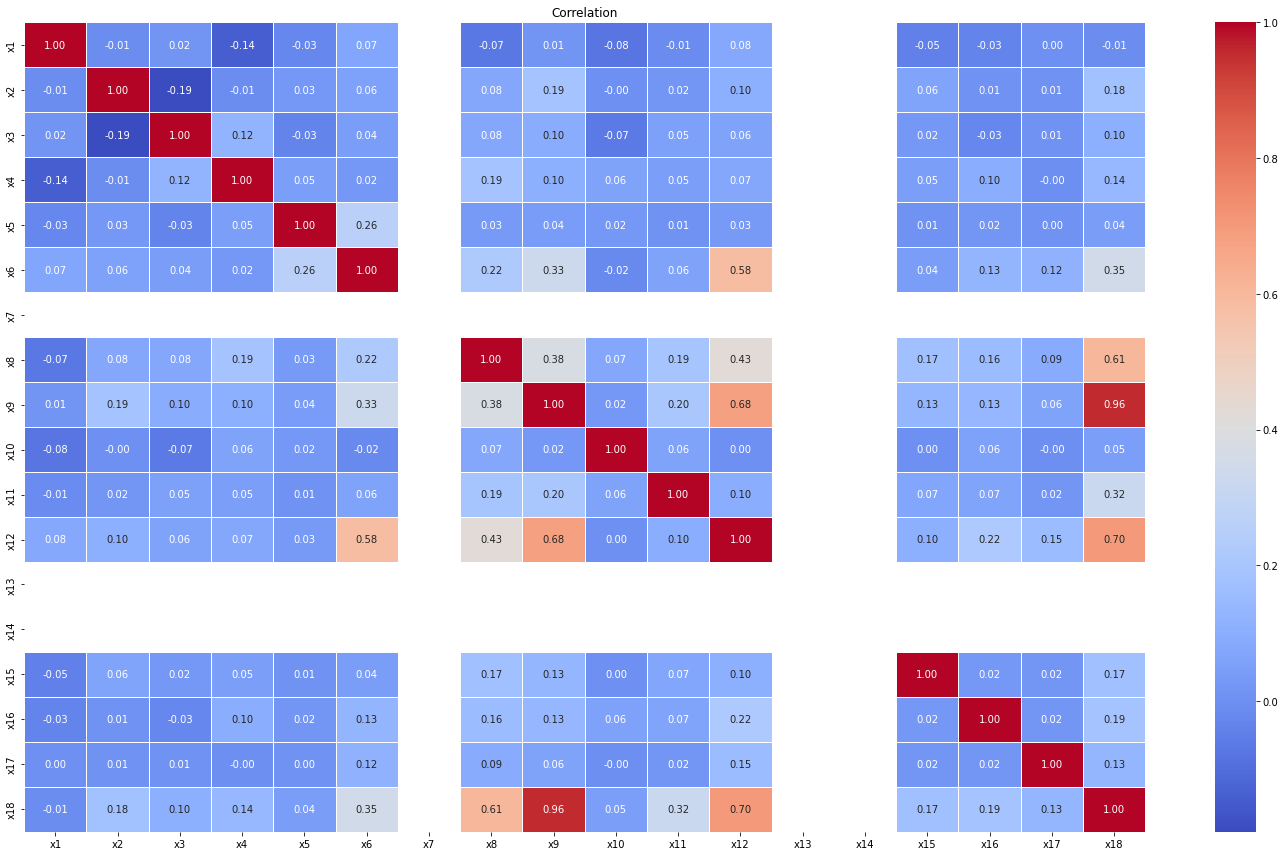

In [9]:
df = X_train

correlation = df.corr()

upper = correlation.where(np.triu(np.ones(correlation.shape), k = 1).astype(np.bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]
print(high_corr_features) 

plt.figure(figsize = (20, 12))
sns.heatmap(correlation, linewidths = 1, annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title("Correlation")
plt.tight_layout()
plt.show()

['x5', 'x7', 'x10', 'x13', 'x14', 'x17']


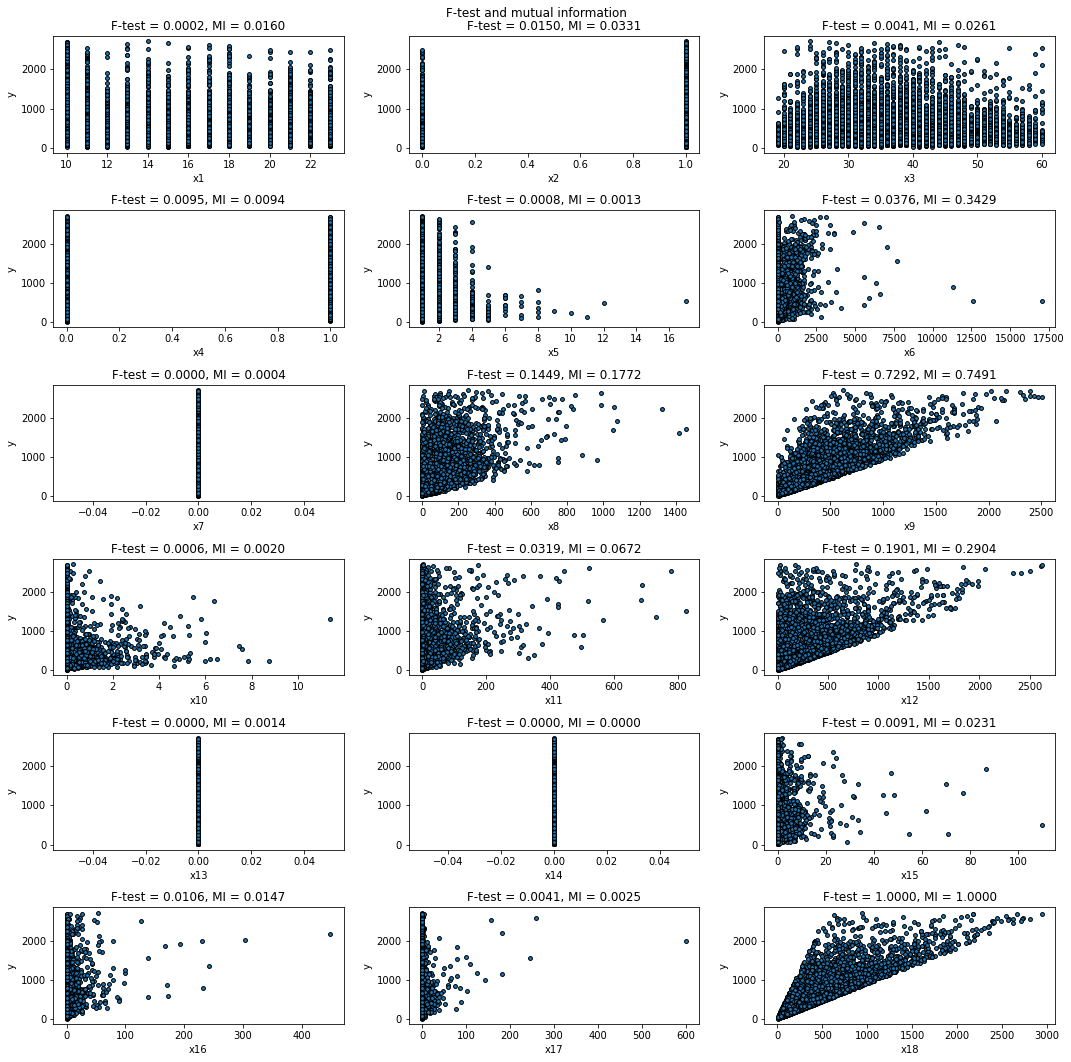

In [10]:
import math
from sklearn.feature_selection import f_regression, mutual_info_regression

features = X_train.columns
df = X_train

f_test, _ = f_regression(df, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(df, y_train)
mi /= np.max(mi)

n_cols = 3
n_rows = math.ceil(len(features) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))
fig.suptitle('F-test and mutual information')

for i, f in enumerate(features):
    c = int(i % n_cols)
    r = int(i / n_cols)
    axs[r, c].scatter(df[f], y_train, edgecolor="black", s=15)
    axs[r, c].set_xlabel(f)
    axs[r, c].set_ylabel('y')
    axs[r, c].set_title(f'F-test = {f_test[i]:.4f}, MI = {mi[i]:.4f}')

plt.tight_layout()

bad_stats_features = [f for i, f in enumerate(df.columns) if f_test[i] < 0.005 and mi[i] < 0.005]
print(bad_stats_features)

In [14]:
category_features = []

for f in X_train.columns:
    if X_train[f].nunique() < 50:
        category_features.append(f)

print(category_features)

['x1', 'x2', 'x3', 'x4', 'x5', 'x7', 'x13', 'x14']


In [15]:
from sklearn.preprocessing import TargetEncoder

encoders = {}
for f in category_features:
    x = X_train.filter([f], axis=1)
    categories = x[f].unique()
    categories.sort()
    categories = list(categories)
    encoder = TargetEncoder(shuffle = False, smooth = 1.0, categories = [categories], target_type = 'continuous')
    encoder.fit(x, y_train)
    encoders[f] = encoder

In [16]:
def encode(X):
    df = X.copy()
    for f in X.columns:
        if f in encoders:
            df[f] = encoders[f].transform(df.filter([f], axis=1))
            
    return df

In [17]:
df = encode(X_train)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
676,481.856399,513.954638,517.566269,438.490163,458.651803,641.13,469.157318,91.63,607.41,0.00,1.25,508.37,469.157318,469.157318,0.0,0.00,0.0,700.28
12113,488.646016,513.954638,335.725085,438.490163,538.396539,66.07,469.157318,14.38,135.61,0.00,1.89,0.40,469.157318,469.157318,0.0,0.00,0.0,151.88
7077,416.531085,513.954638,470.762566,438.490163,458.651803,1012.49,469.157318,353.62,319.79,0.18,0.44,607.78,469.157318,469.157318,0.0,3.04,0.0,677.07
13005,408.205640,336.291907,579.291061,438.490163,458.651803,0.00,469.157318,5.68,268.22,0.00,0.00,0.00,469.157318,469.157318,0.0,0.00,0.0,273.90
12123,464.031558,336.291907,545.485083,438.490163,458.651803,266.59,469.157318,1.07,388.63,0.00,0.00,331.20,469.157318,469.157318,0.0,0.00,0.0,389.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,488.646016,513.954638,502.218566,438.490163,458.651803,0.00,469.157318,2.50,241.61,0.00,0.00,75.74,469.157318,469.157318,0.0,0.00,0.0,244.10
5390,488.646016,513.954638,517.587660,438.490163,458.651803,0.00,469.157318,21.21,336.19,0.00,1.28,11.78,469.157318,469.157318,0.0,0.00,0.0,358.67
860,399.938098,336.291907,496.069561,438.490163,458.651803,0.00,469.157318,19.34,275.04,0.00,0.00,0.00,469.157318,469.157318,0.0,0.00,0.0,294.38
15795,476.576071,336.291907,463.243089,438.490163,458.651803,146.97,469.157318,15.38,125.94,0.00,1.55,127.27,469.157318,469.157318,0.0,0.00,0.0,142.87


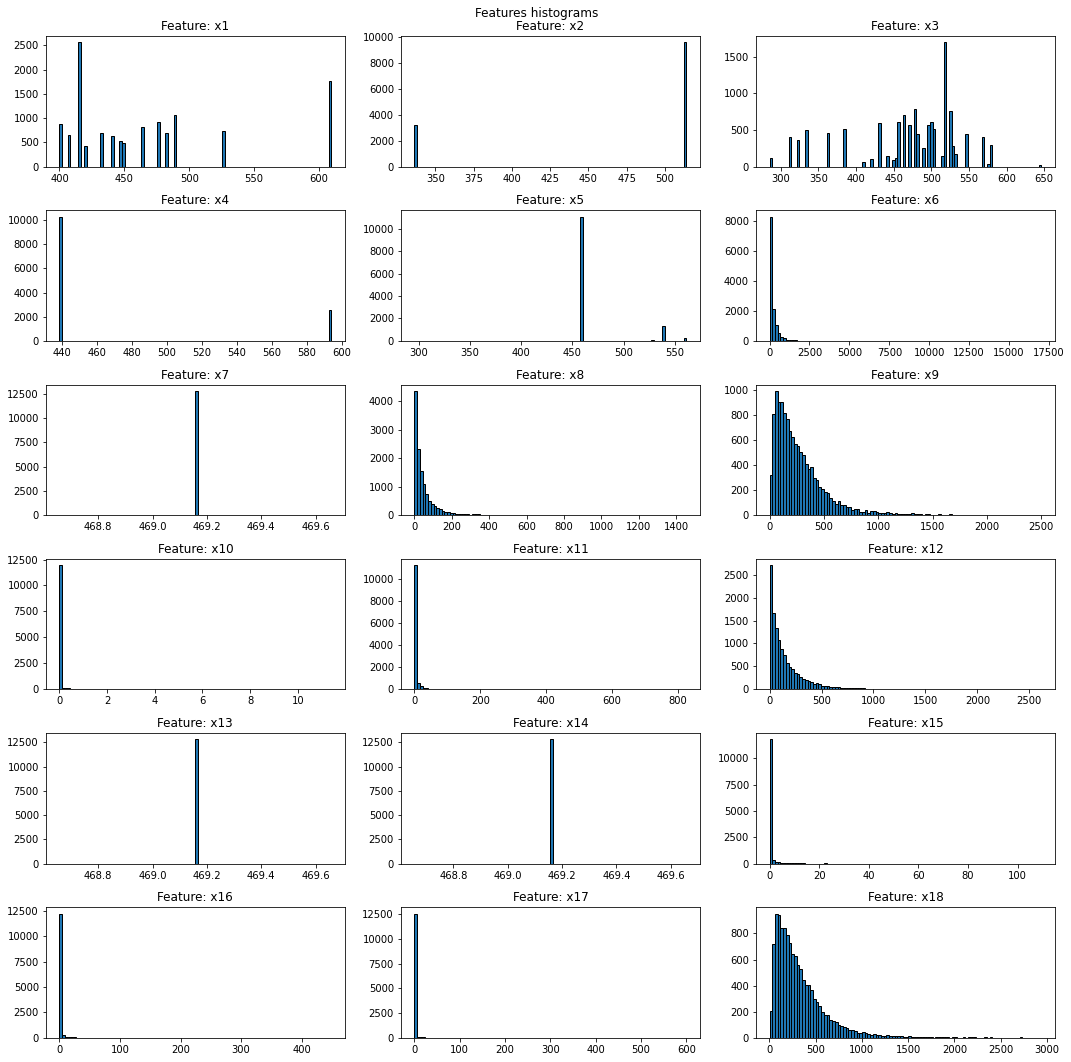

In [18]:
n_cols = 3
n_rows = int(len(features) / n_cols) 

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))
fig.suptitle('Features histograms')

for i in range(n_rows):
    for j in range(n_cols):
        feature = features[j + n_cols * i]
        axs[i, j].hist(df[feature], bins=100, edgecolor="black")
        axs[i, j].set_title(f'Feature: {feature}')
        
plt.tight_layout()

In [63]:
from sklearn.linear_model import LinearRegression
#x_df = train_df.drop(['index', 'y'], axis = 1)

drop_features = set(constant_features + high_corr_features + bad_stats_features)

model = LinearRegression().fit(X_train.drop(drop_features, axis = 1), y_train)
print(model.score(X_train.drop(drop_features, axis = 1), y_train))
print(model.score(X_test.drop(drop_features, axis = 1), y_test))


0.7314879540283747
0.7546055808114017


In [224]:
def mape_loss(y_pred, data):
    y_true = data.get_label()
    grad = (y_pred - y_true) / np.maximum(1e-5, np.abs(y_true))
    hess = 1 / np.maximum(1e-5, np.abs(y_true))
    return grad, hess

def mape_metric(y_pred, data):
    y_true = data.get_label()
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(1e-5, np.abs(y_true))))
    return 'mape', mape, False

In [49]:
X_target.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,14.0,1,30,1,1,0.00,0.0,209.29,358.34,0.0,1.49,33.67,0.0,0.0,0.00,1.60,0.00,570.72
1,14.0,0,26,0,1,154.91,0.0,19.08,146.38,0.0,0.00,96.97,0.0,0.0,0.00,0.00,0.00,165.45
2,10.0,1,32,0,1,0.00,0.0,121.21,428.18,0.0,17.90,62.89,0.0,0.0,18.12,0.00,0.00,585.42
3,15.0,1,42,1,1,1244.46,0.0,407.67,804.93,0.0,9.98,932.81,0.0,0.0,20.65,2.73,2.28,1250.52
4,19.0,1,33,0,2,1284.48,0.0,196.50,874.94,0.0,9.17,828.86,0.0,0.0,0.00,0.21,0.37,1081.56


In [19]:
#drop_features = set(constant_features + high_corr_features + bad_stats_features)
drop_features = set(constant_features) #set(constant_features + bad_stats_features)
#drop_features = set(constant_features + bad_stats_features)
x_train = X_train.drop(drop_features, axis = 1)
x_test = X_test.drop(drop_features, axis = 1)
x_target = X_target.drop(drop_features, axis = 1)

In [351]:
x_train = encode(X_train).drop(drop_features, axis = 1)
x_test = encode(X_test).drop(drop_features, axis = 1)
x_target = encode(X_target).drop(drop_features, axis = 1)

In [353]:
x_train = encode(X_train)
x_test = encode(X_test)
x_target = encode(X_target)

In [355]:
x_train = (X_train)
x_test = (X_test)
x_target = (X_target)

In [191]:
model = LinearRegression().fit(x_train, y_train, 1/y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.716678005701168
0.7389106273179411


In [192]:
mape = mean_absolute_percentage_error(y_test, model.predict(x_test))
print(f"MAPE на тестовой выборке: {mape}")

MAPE на тестовой выборке: 0.2629810793762254


In [234]:
x_train.head()

,x1,x2,x3,x4,x6,x8,x9,x11,x12,x15,x16
676,23.0,1,39,0,641.13,91.63,607.41,1.25,508.37,0.0,0.00
12113,18.0,1,23,0,66.07,14.38,135.61,1.89,0.40,0.0,0.00
7077,11.0,1,29,0,1012.49,353.62,319.79,0.44,607.78,0.0,3.04
13005,16.0,0,41,0,0.00,5.68,268.22,0.00,0.00,0.0,0.00
12123,14.0,0,36,0,266.59,1.07,388.63,0.00,331.20,0.0,0.00


In [402]:
[x / 10.0 for x in range(1, 11)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [29]:
from sklearn.model_selection import ParameterGrid

hyperparams = ParameterGrid({
    'objective': ['mape'],
    'metric': ['mape'],
    'random_state': [20],
    'learning_rate': [0.02, 0.05, 0.1, 0.2, 0.5],
    'num_leaves': [7, 15, 31, 63],
    'min_data_in_leaf': [10, 50, 100, 150, 200],
    'max_depth': [4, 5, 6, 7],
})

In [31]:
table = []

for i, hp in enumerate(hyperparams):
    if hp['num_leaves'] < 2**hp['max_depth']:
        cv = lgb.cv(
            hyperparams[0], 
            train_set, 
            num_boost_round = 500,
            callbacks = [lgb.early_stopping(stopping_rounds = 100)],
            stratified = False,
            seed = 42
        )

        table.append({
                'hyperparams' : hp,
                'mape-score' : cv['valid mape-mean'][-1],
        })
        
        print(f'\n\n{i}/{len(hyperparams)}:\n {table[-1]}\n\n')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_col_wise=t

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


5/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 4, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015829 seconds.
You can set `for

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


13/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 4, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


21/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threadin

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


26/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


32/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


37/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


42/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threadin

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


46/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


50/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


54/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


58/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


62/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

[LightGBM] [Info] Start training from score 186.419998
[LightGBM] [Info] Start training from score 185.050003
[LightGBM] [Info] Start training from score 187.070007
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


66/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


70/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threadi

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


74/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


78/400:
 {'hyperparams': {'learning_rate': 0.02, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


84/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 4, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used featu

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


92/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 4, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threadin

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


100/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


105/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


110/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fe

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


116/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


121/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threadi

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


125/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


129/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fe

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


133/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-thread

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


137/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fe

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


141/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


145/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


149/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fe

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


153/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fe

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


157/400:
 {'hyperparams': {'learning_rate': 0.05, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fe

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


161/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 4, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


169/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 4, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


177/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 4, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


184/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


189/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.2494053743948888}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


194/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


200/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used featu

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


204/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used featu

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


208/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


212/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


216/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


220/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


224/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used featu

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


228/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


232/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


236/400:
 {'hyperparams': {'learning_rate': 0.1, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


240/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 4, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used featu

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


248/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 4, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threadin

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


256/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 4, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


262/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


268/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


273/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.2494053743948888}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


278/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


283/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 63, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


287/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 63, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


291/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 63, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threadi

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


295/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 63, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


299/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 63, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.2494053743948888}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


303/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 63, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


307/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 63, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


311/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 63, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


315/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 63, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


319/400:
 {'hyperparams': {'learning_rate': 0.2, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 63, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


325/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 4, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


333/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 4, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


341/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.2494053743948888}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


346/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threadin

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


352/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 7, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `fo

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


357/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 5, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 15, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threadi

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


362/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threadin

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


366/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threadin

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


370/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threadi

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


374/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


378/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 6, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


382/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 10, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


386/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 50, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used feat

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


390/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 100, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


394/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 150, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.24940537439488883}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used fea

Did not meet early stopping. Best iteration is:
[500]	cv_agg's valid mape: 0.249405 + 0.00413019


398/400:
 {'hyperparams': {'learning_rate': 0.5, 'max_depth': 7, 'metric': 'mape', 'min_data_in_leaf': 200, 'num_leaves': 31, 'objective': 'mape', 'random_state': 20}, 'mape-score': 0.2494053743948888}


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 10240, number of used features: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threadin

In [32]:
table

[{'hyperparams': {'learning_rate': 0.02,
   'max_depth': 4,
   'metric': 'mape',
   'min_data_in_leaf': 10,
   'num_leaves': 7,
   'objective': 'mape',
   'random_state': 20},
  'mape-score': 0.2494053743948888},
 {'hyperparams': {'learning_rate': 0.02,
   'max_depth': 4,
   'metric': 'mape',
   'min_data_in_leaf': 10,
   'num_leaves': 15,
   'objective': 'mape',
   'random_state': 20},
  'mape-score': 0.24940537439488883},
 {'hyperparams': {'learning_rate': 0.02,
   'max_depth': 4,
   'metric': 'mape',
   'min_data_in_leaf': 50,
   'num_leaves': 7,
   'objective': 'mape',
   'random_state': 20},
  'mape-score': 0.24940537439488883},
 {'hyperparams': {'learning_rate': 0.02,
   'max_depth': 4,
   'metric': 'mape',
   'min_data_in_leaf': 50,
   'num_leaves': 15,
   'objective': 'mape',
   'random_state': 20},
  'mape-score': 0.24940537439488883},
 {'hyperparams': {'learning_rate': 0.02,
   'max_depth': 4,
   'metric': 'mape',
   'min_data_in_leaf': 100,
   'num_leaves': 7,
   'objective'

In [34]:
best = min(table, key = lambda x: x['mape-score'])
best_params = best['hyperparams']
best

{'hyperparams': {'learning_rate': 0.02,
  'max_depth': 6,
  'metric': 'mape',
  'min_data_in_leaf': 200,
  'num_leaves': 7,
  'objective': 'mape',
  'random_state': 20},
 'mape-score': 0.24940537439488875}

In [23]:
import lightgbm as lgb

dataset_params = {
    #"min_data_in_bin": 200, 
    #"max_bin": 511, 
    'feature_pre_filter': False
}

train_set = lgb.Dataset(x_train, label = y_train, params = dataset_params)
test_set = lgb.Dataset(x_test, label = y_test, params = dataset_params, reference = train_set)

In [37]:
from sklearn.metrics import mean_absolute_percentage_error

model = lgb.train(
    best_params,
    train_set, 
    valid_sets = [train_set, test_set],
    num_boost_round = 500,
    callbacks = [lgb.early_stopping(stopping_rounds = 100)]
)

predicts = model.predict(x_test)
mape = mean_absolute_percentage_error(y_test, predicts)
print(f"MAPE на тестовой выборке: {mape}")

y_target_pred = model.predict(x_target)

submission = pd.DataFrame({"index": sample_df["index"], "y": y_target_pred})
submission.to_csv("submission.csv", index=False)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 15
[LightGBM] [Info] Start training from score 186.460007
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[500]	training's mape: 0.240575	valid_1's mape: 0.244125
MAPE на тестовой выборке: 0.2441247293039458


In [356]:
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# Обучение модели
train_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

params = {
    "objective": "mape",
    "metric": "mape",
    "learning_rate": 0.2, # !!!
    "num_leaves": 16, # !!!
    "max_depth": 5,
    "random_state": 20,
    "num_boost_round": 100,
    "min_data_in_leaf": 100,
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],

    #feval=mape_metric,  # Кастомная метрика
    #num_boost_round=500,
    callbacks=[lgb.early_stopping(stopping_rounds=40)], 
)

y_test_pred = model.predict(x_test)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
print(f"MAPE на тестовой выборке: {mape}")

# Итоговые предсказания и сохранение в .csv файл
y_target_pred = model.predict(x_target)

submission = pd.DataFrame({"index": sample_df["index"], "y": y_target_pred})
submission.to_csv("submission.csv", index=False)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 15
[LightGBM] [Info] Start training from score 186.460007
Training until validation scores don't improve for 40 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [ ]:
[43]	training's mape: 0.238605	valid_1's mape: 0.243669
MAPE на тестовой выборке: 0.24366911544674758